## PML
One dimensional scalar wave equation has the following form:
$$ u_{tt} - v^2u_{xx} = f(x, t)$$
The PML for it is:
\begin{equation}
\begin{split}
&u_{tt} + \sigma u_{t} = v^2(u_{xx} + \phi_x) + f\\
&\phi_t = -\sigma\phi - \sigma u_x
\end{split}
\end{equation}

Using central difference for $u_{tt}$ and $u_t$:
$$ \frac{u^{n+1} - 2u^n + u^{n-1}}{dt^2} + \sigma\frac{u^{n+1}-u^{n-1}}{2dt} = v^2(u^n_{xx} + \phi^n_x) + f^n$$
Using a forward difference for $\phi_t$:
$$\frac{\phi^{n+1} - \phi^{n}}{dt} = -\sigma \phi^n - \sigma u^n_x$$

Rearrange them we get:
$$ u^{n+1} = \frac{v^2dt^2(u^n_{xx} + \phi^n_x)}{1+\frac{\sigma dt}{2}} + \frac{2u^n-u^{n-1}}{1+\frac{\sigma dt}{2}} + \frac{\sigma dt u^{n-1}}{2 + \sigma dt} + dt^2f^n$$
and 
$$ \phi^{n+1} = -dt\sigma\phi^n + \phi^n - \sigma dtu^n_x$$

In [7]:
from wave1d import Solver
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [8]:
dx = 10.0
dt = 0.001
model = np.ones(101) * 1500.
sol = Solver(model, dx, dt, 50)
sol.step()
wavefield = sol.wavefield
nptx = sol.nptx
nt = len(wavefield)

CFL number is 0.15


<IPython.core.display.Javascript object>


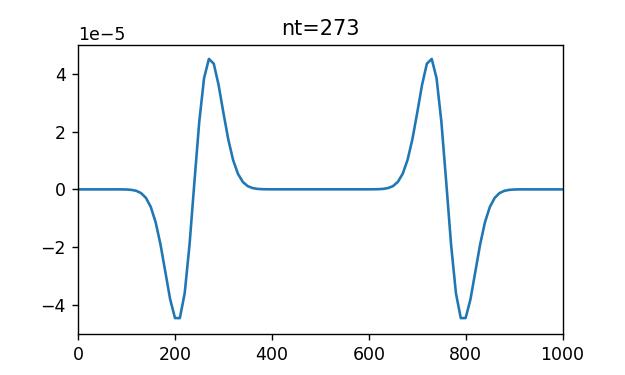

In [9]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
line, = ax.plot([], [])

ax.set_xlim(0, dx*(nptx-1))
ax.set_ylim(-5e-5, 5e-5)

def animate(it):
    x = np.arange(nptx) * dx
    y = wavefield[it]
    ax.set_title(f'nt={it}')
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=nt, interval=5)
plt.show()

<IPython.core.display.Javascript object>


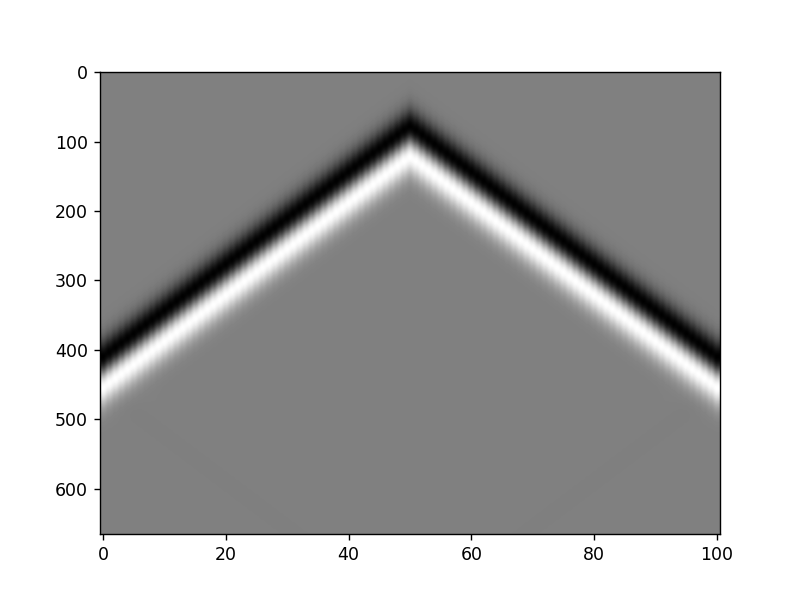

In [6]:
awavefield = np.r_[wavefield]
plt.imshow(awavefield, aspect='auto', cmap='gray')
np.savetxt('wavefields.txt', awavefield)

## Green function
reference https://math.stackexchange.com/questions/798363/greens-function-of-1-d-forced-wave-equation

The Green's function $g(x, t, \xi, \tau)$ is:
$$ g_{tt} - v^2g_{xx} = \delta(x-\xi)\delta(t-\tau)$$
with
$$ g(x, 0, \xi, \tau) = g_t(x, 0, \xi, \tau) = 0$$
After performing Fourier transform in both side of the equation, we get:
$$ g_{tt} + (vk)^2g = \delta(t-\tau)e^{-ik\xi}$$
The solution of this ODE is:
$$ g(k, t) = \frac{\sin vk(t-\tau)H(t-\tau)}{vk}$$
Apply inverse Fourier we can get:
$$ g(x, t) = \frac{1}{2\pi}H(t-\tau)\int \frac{\sin vk(t-\tau)}{vk}e^{ik(x-\xi)}dk$$
We have
$$ e^{ik(x-\xi)} = \cos vk\frac{x-\xi}{v} + i\sin vk\frac{x-\xi}{v}$$
Using the fact that:
$$ 2\sin a(\cos b + i\sin b) = \sin(a - b) + \sin(a + b) + i[\cos(a-b) -\cos(a + b)] $$
and 
$$\int \frac{\sin ka}{k} = \pi sgn(a) $$

In which $sgn(a) = -1, 0$ and 1 for $a < 0, a=0$ and $a > 0$
we can get:
$$ g(x, t; \xi, \tau) = \frac{1}{2v}H(t-\tau-\frac{|x-\xi|}{v})$$
Let $f(x, t) = \delta(x-x_0)w(t)$ be a point source, then the wavefield generate by it at a given location $x$ and time $t$
is 
$$ u(x, t) = \int \frac{1}{2v}w(\tau)H(t-\tau-\frac{|x-x_0|}{v})d\tau$$

In [32]:
def green(x, t, x0, v, f, dt, dx):
    u = np.sum(f[:np.maximum(0, int((t - np.abs(x-x0)/v)/dt))])*dt*dx/(2*v)
    return u

In [33]:
nptx = sol.nptx
t = 300 * dt
x0 = 50 * dx
v= 1500.
f = sol.source_time
expected = np.array([green(x*dx, t, x0, v, f, dt, dx) for x in range(nptx)])

<IPython.core.display.Javascript object>


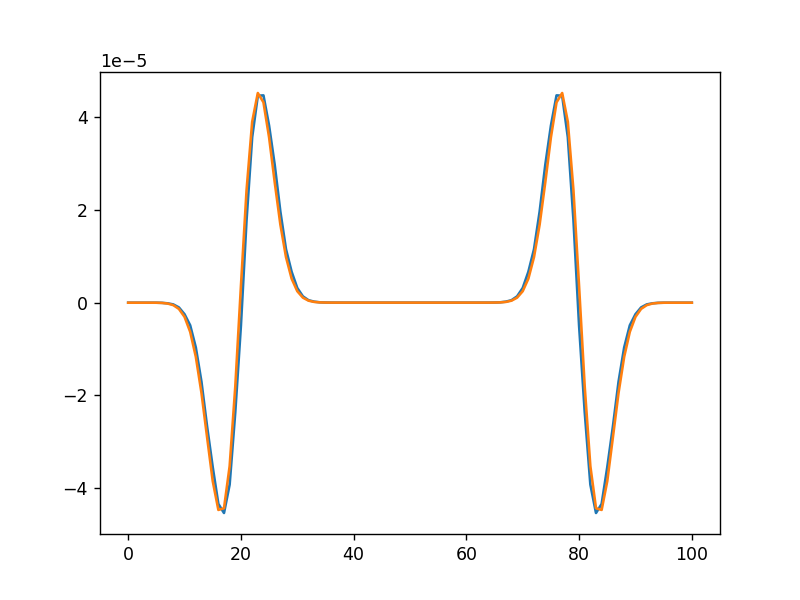

In [35]:
plt.plot(expected)

In [36]:
plt.plot(awavefield[300])